<a href="https://colab.research.google.com/github/kapil0808/Kaggle-first-problem/blob/main/Customer_segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
customers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ecommerce/olist_customers_dataset.csv')
customers_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [3]:
items_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ecommerce/olist_order_items_dataset.csv')
items_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [4]:
payments_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ecommerce/olist_order_payments_dataset.csv')
payments_df.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [5]:
orders_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ecommerce/olist_orders_dataset.csv')
orders_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [6]:
products_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ecommerce/olist_products_dataset.csv')
products_df.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [7]:
sellers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ecommerce/olist_sellers_dataset.csv')
sellers_df.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [8]:
categories_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ecommerce/product_category_name_translation.csv')
categories_df.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [9]:
order_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ecommerce/olist_order_reviews_dataset.csv')

In [10]:

dataframes = {'customers': customers_df,
              'items': items_df, 
              'payments': payments_df, 
              'orders': orders_df, 
              'products': products_df, 
              'sellers': sellers_df, 
              'categories': categories_df}
for i, j in dataframes.items():
    print(f'{i:12s} dataframe: {str(len(j)):7s} rows')

customers    dataframe: 99441   rows
items        dataframe: 112650  rows
payments     dataframe: 103886  rows
orders       dataframe: 99441   rows
products     dataframe: 32951   rows
sellers      dataframe: 3095    rows
categories   dataframe: 71      rows


In [11]:
products_df = pd.merge(products_df, categories_df, on='product_category_name', how='left')
products_df.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)
products_df.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure


In [12]:
df = pd.merge(orders_df, customers_df, on='customer_id')
df = df.merge(items_df, on='order_id')
df = df.merge(payments_df, on='order_id')
df = df.merge(products_df, on='product_id')
df = df.merge(sellers_df, on='seller_id')
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP


In [13]:
customer_by_state = df[['customer_unique_id', 'customer_state']].groupby('customer_state').count().reset_index()
customer_by_state = customer_by_state.sort_values(by=['customer_unique_id'])
customer_by_state.head(2)

,customer_state,customer_unique_id
21,RR,52
3,AP,84



Where do most customers come from i.e from which area order of products is highest?

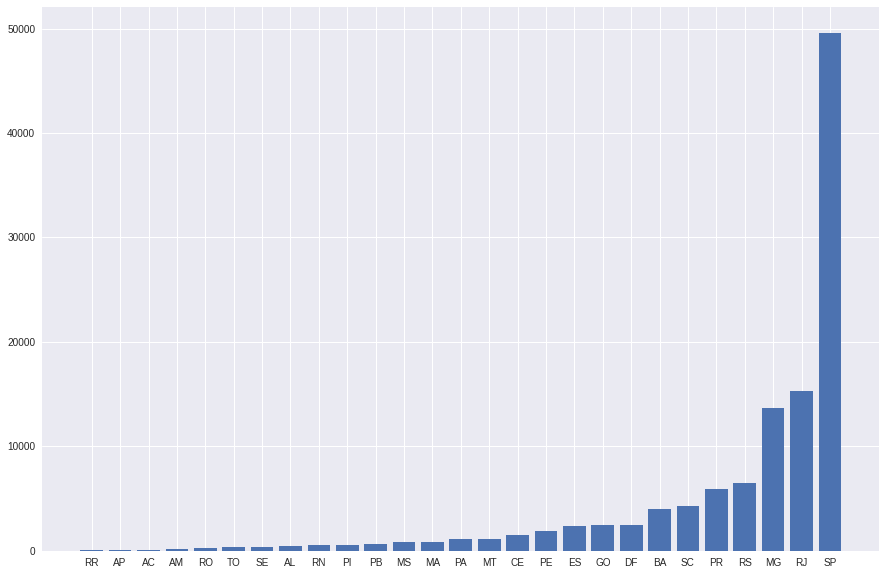

In [14]:
plt.style.use('seaborn')
plt.figure(figsize=(15,10))
plt.bar(customer_by_state['customer_state'], customer_by_state['customer_unique_id'])
plt.show()

Most customers are from the states and cities of Sao Paul, followed by Rio de Janeiro. This is not too suprising because the highest populations of people in Brazil are  from these states and cities.


What are the most and less frequent items that are bought by customers ?

Text(0, 0.5, 'Product')

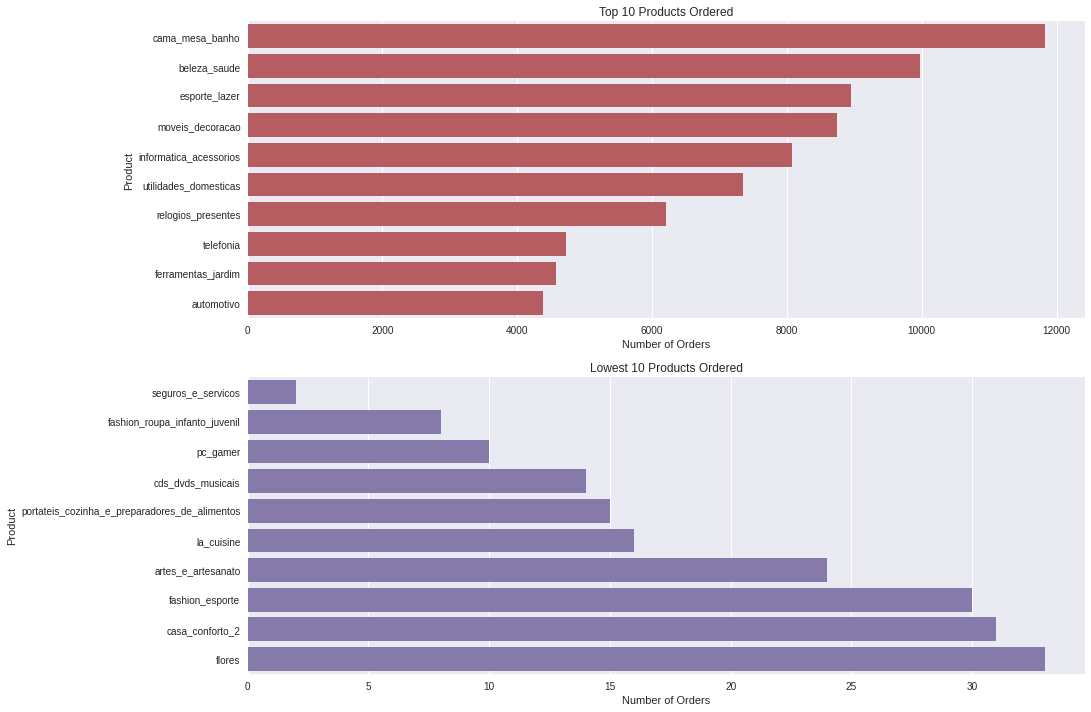

In [15]:
import seaborn as sns
top_products = df['product_category_name'].value_counts().reset_index().nlargest(10,'product_category_name')
lowest_products = df['product_category_name'].value_counts().reset_index().nsmallest(10,'product_category_name')

plt.figure(figsize = (15,12))
red_color = sns.color_palette()[3]
green_color = sns.color_palette()[2]

plt.subplot(211)
sns.barplot(data = top_products, x = 'product_category_name', y = 'index', color = green_color)
plt.title('Top 10 Products Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Product');

plt.subplot(212)
sns.barplot(data = lowest_products, x = 'product_category_name', y = 'index', color = red_color)
plt.title('Lowest 10 Products Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Product')

Bed and bath products are the top products ordered followed by beauty products, and sports leisure products.

Insurance services have the lowest amount of products ordered, followed by kids clothes, and pc gaming products.

What are the most common types of payment?

Text(0, 0.5, 'Count of Orders')

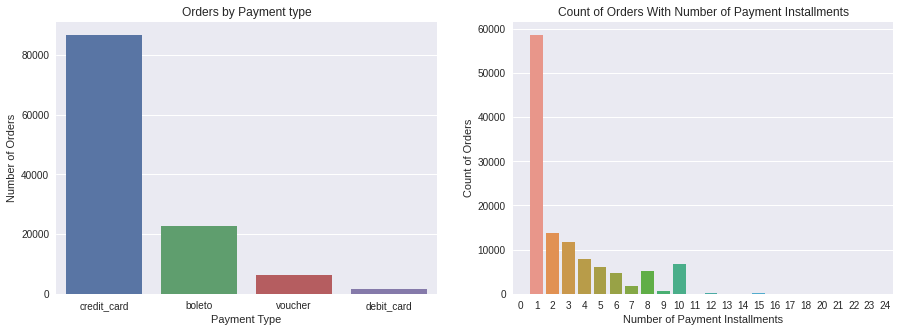

In [16]:
payments_types = df['payment_type'].value_counts().reset_index()

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.barplot(data = payments_types, x = 'index', y = 'payment_type')
plt.title('Orders by Payment type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')


plt.subplot(122)
sns.barplot(data = df['payment_installments'].value_counts().reset_index(), x = 'index', y = 'payment_installments')
plt.title('Count of Orders With Number of Payment Installments')
plt.xlabel('Number of Payment Installments')
plt.ylabel('Count of Orders')

on the left graph,we see that credit cards take up most of the orders. In fact, they are 3 times higher than any other payment type in the data set.


on the right graph,we see that the most common number of payment installments is 1. After that the number of orders decreases as the number of payment installments increases. However, for 8 and 10 payment installments there is bit rise in number of order.


What are the top 10 most rated products ?

Text(0, 0.5, 'Review Score')

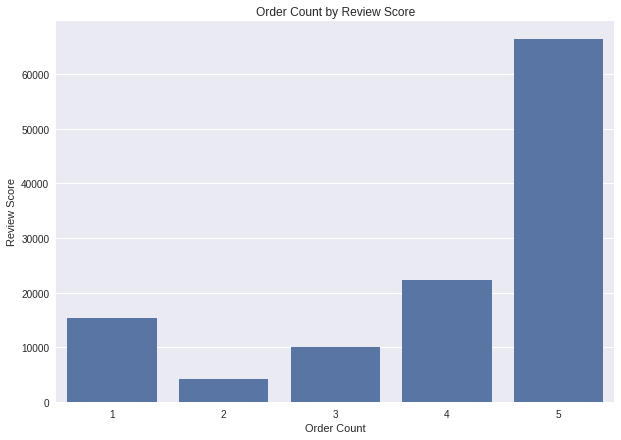

In [17]:
product_reviews = pd.merge(df,order_reviews)
base_color = sns.color_palette()[0]

plt.figure(figsize = (10,7))
sns.barplot(data = product_reviews.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id', color = base_color)
plt.title('Order Count by Review Score')
plt.xlabel('Order Count')
plt.ylabel('Review Score')

The highest amount of orders have 5 start reviews and as the ratings decrease so do the order counts, except for 1. A review score of 1 has more orders than 2 or 3.

Text(0, 0.5, 'Product Category Name')

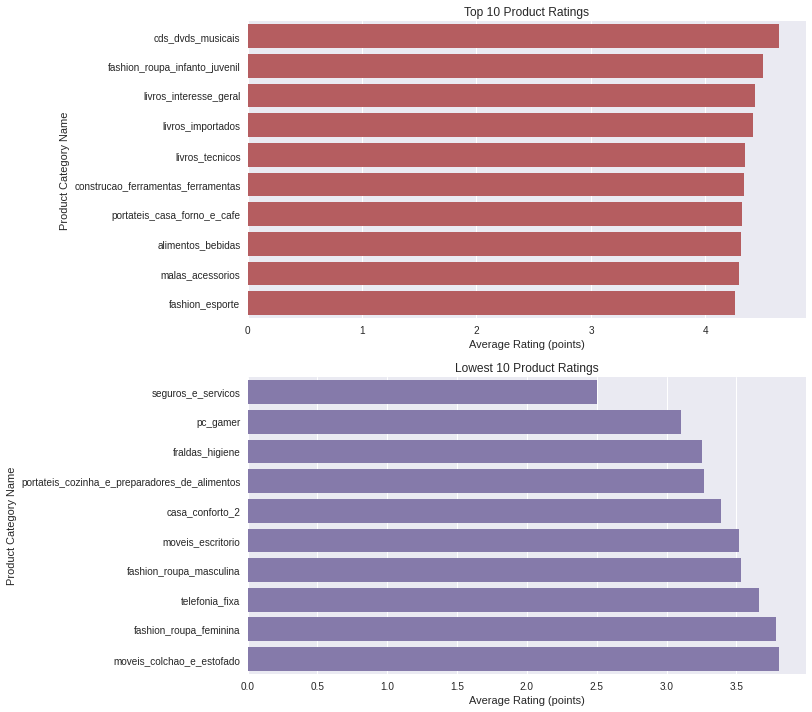

In [18]:

prd_rev_means = product_reviews.groupby('product_category_name').mean()['review_score'].reset_index()
top_10_ratings = prd_rev_means.sort_values('review_score', ascending = False).nlargest(10,'review_score')
lowest_10_ratings = prd_rev_means.sort_values('review_score', ascending = False).nsmallest(10,'review_score')

plt.figure(figsize = (10,12))

sns.barplot(data = product_reviews.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id', color = base_color)
plt.title('Order Count by Review Score')
plt.xlabel('Order Count')
plt.ylabel('Review Score')

plt.subplot(211)
sns.barplot(data = top_10_ratings, x = 'review_score', y = 'product_category_name', color = green_color)
plt.title('Top 10 Product Ratings')
plt.xlabel('Average Rating (points)')
plt.ylabel('Product Category Name')


plt.subplot(212)
sns.barplot(data = lowest_10_ratings, x = 'review_score', y = 'product_category_name', color = red_color)
plt.title('Lowest 10 Product Ratings')
plt.xlabel('Average Rating (points)')
plt.ylabel('Product Category Name')

Music, dvd, and cds category recieved the highest review average. This makes sense because those are not items you can really give a bad rating for. Next is kids clothes. They may have a really low amount of orders but it seems that they get good reviews. A lot of book types are also included in having the best review average. This may suggest that selling movies, books, and music may be a really great way to get great reviews.

Insurance Services get the worse ratings. This may be something that may not be worth having at this store. It may a good idea to either improve the insurance services or get rid of them all together.

The next item with the worst reviews are diapers with a score of about 3.25 along with portable kitchens and food preparer type products.

Pc gaming products come next, which is also interesting because they are also bought the least. It would definitely be a good idea to have look into this ,consider an option of discontinuing pc gaming products.

In [19]:
df['order_purchase_year'] = pd.to_datetime(df['order_purchase_timestamp']).dt.year
df['order_purchase_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.month
df['order_purchase_day'] = pd.to_datetime(df['order_purchase_timestamp']).dt.day
df['order_purchase_hour'] = pd.to_datetime(df['order_purchase_timestamp']).dt.hour
orders = df[['order_id', 'order_purchase_year', 'order_purchase_month']]
orders.head(3)

,order_id,order_purchase_year,order_purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,2017,10
1,e481f51cbdc54678b7cc49136f2d6af7,2017,10
2,e481f51cbdc54678b7cc49136f2d6af7,2017,10


In [20]:
orders = orders.groupby(['order_purchase_month', 'order_purchase_year']).count().reset_index()
orders = orders.sort_values(by=['order_purchase_year', 'order_purchase_month'])
orders["period"] =  orders["order_purchase_month"].astype(str) + "/" + orders["order_purchase_year"].astype(str)
orders.head(3)

,order_purchase_month,order_purchase_year,order_id,period
16,9,2016,3,9/2016
19,10,2016,381,10/2016
22,12,2016,1,12/2016


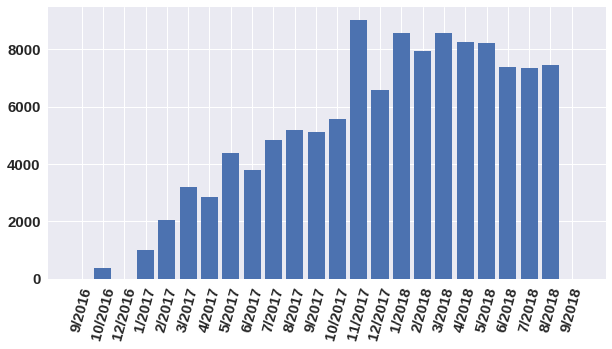

In [21]:
plt.figure(figsize=(10,5))
plt.bar(orders['period'], orders['order_id'])
plt.xticks(rotation=75, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

In [22]:
orders.groupby(['order_purchase_year']).sum()

,order_purchase_month,order_id
order_purchase_year,,
2016,31,385
2017,78,53539
2018,45,63677


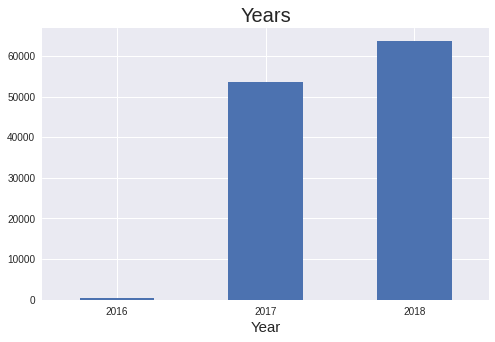

In [23]:
df['Year'] = df['order_purchase_year']
df.groupby('Year').size().plot(kind = 'bar',figsize=(8,5));
plt.title('Years',fontsize=20);
plt.xlabel('Year',fontsize=15);
plt.xticks(rotation=0);

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


we can see that the year 2018 was the year with the most orders

In [25]:
top_categories = df[['product_category', 'order_item_id']]
top_categories = top_categories.groupby(['product_category']).sum().sort_values(by=['order_item_id'], ascending=False).reset_index()
top_categories[:10]

,product_category,order_item_id
0,bed_bath_table,14539
1,furniture_decor,12055
2,health_beauty,11426
3,sports_leisure,10279
4,computers_accessories,10186
5,housewares,9530
6,watches_gifts,6811
7,garden_tools,6129
8,telephony,5349
9,auto,5042


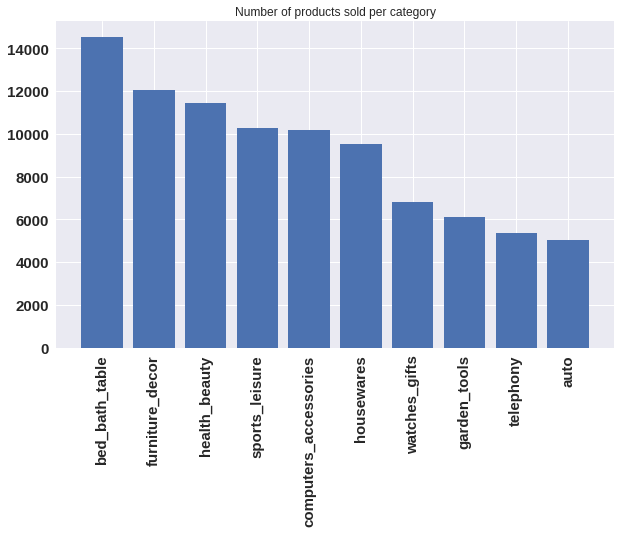

In [26]:
plt.figure(figsize=(10,6))
plt.bar(top_categories['product_category'][:10], top_categories['order_item_id'][:10])
plt.title('Number of products sold per category')
plt.xticks(rotation=90, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

In [27]:
columns = ['order_status', 'customer_state', 'order_item_id', 'price', 
           'freight_value', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 
           'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'order_purchase_hour']
df = df[columns]
df.head()

,order_status,customer_state,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour
0,delivered,SP,1,29.99,8.72,1,credit_card,1,18.12,2017,10,2,10
1,delivered,SP,1,29.99,8.72,3,voucher,1,2.00,2017,10,2,10
2,delivered,SP,1,29.99,8.72,2,voucher,1,18.59,2017,10,2,10
3,delivered,SP,1,29.99,7.78,1,credit_card,3,37.77,2017,8,15,18
4,delivered,SP,1,29.99,7.78,1,credit_card,1,37.77,2017,8,2,18


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_status          117601 non-null  object 
 1   customer_state        117601 non-null  object 
 2   order_item_id         117601 non-null  int64  
 3   price                 117601 non-null  float64
 4   freight_value         117601 non-null  float64
 5   payment_sequential    117601 non-null  int64  
 6   payment_type          117601 non-null  object 
 7   payment_installments  117601 non-null  int64  
 8   payment_value         117601 non-null  float64
 9   order_purchase_year   117601 non-null  int64  
 10  order_purchase_month  117601 non-null  int64  
 11  order_purchase_day    117601 non-null  int64  
 12  order_purchase_hour   117601 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 12.6+ MB


In [29]:
df.isnull().sum()

order_status            0
customer_state          0
order_item_id           0
price                   0
freight_value           0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
order_purchase_year     0
order_purchase_month    0
order_purchase_day      0
order_purchase_hour     0
dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


num_attributes = ['order_item_id', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 
                  'payment_value', 'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'order_purchase_hour']
cat_attributes = ['order_status', 'customer_state', 'payment_type']

pipeline = ColumnTransformer([
        ('num', StandardScaler(), num_attributes),
        ('cat', OneHotEncoder(), cat_attributes),
])
df_prepared = pipeline.fit_transform(df).toarray()


In [31]:
df_prepared.shape

(117601, 48)

In [32]:
from sklearn.decomposition import PCA

# Preserving 95% of the variance
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df_prepared)
df_reduced
df_reduced.shape


(117601, 13)

In [33]:
from sklearn.cluster import KMeans

k_range = range(2, 15)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_reduced)
                for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]

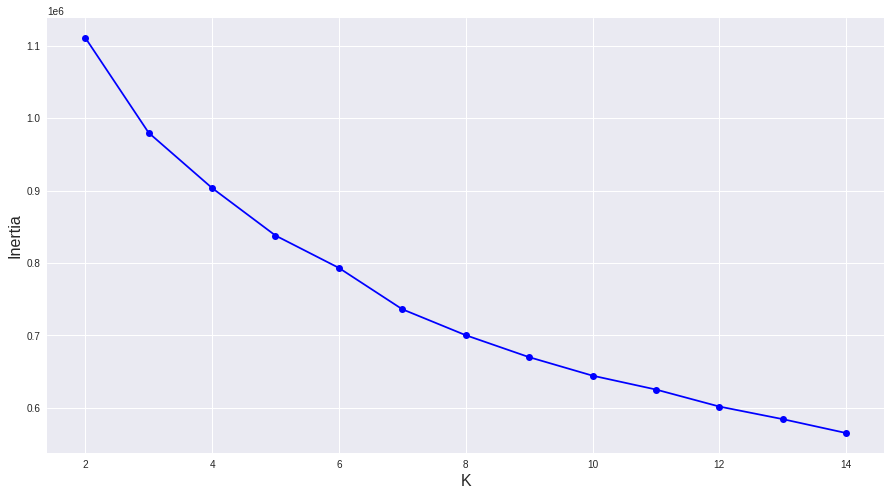

In [34]:
plt.figure(figsize=(15, 8))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('K', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.show()

In [35]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(df_reduced, model.labels_)
                      for model in kmeans_per_k]

In [36]:
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

best_k

4

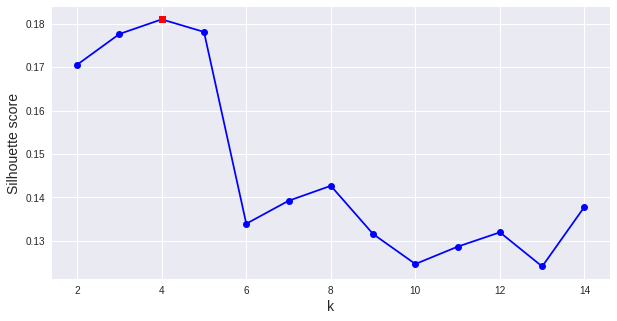

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

We can see that the best number of clusters is 4

In [38]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [39]:
y_pred = best_model.fit_predict(df_reduced)

In [40]:
import pickle
pickle.dump(best_model,open('model.pkl','wb'))

In [41]:
for i in range(best_k):
    print(f"cluster {i + 1} contains: {np.sum(y_pred == i)} customers")

cluster 1 contains: 51225 customers
cluster 2 contains: 60638 customers
cluster 3 contains: 5026 customers
cluster 4 contains: 712 customers


In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(df_prepared)

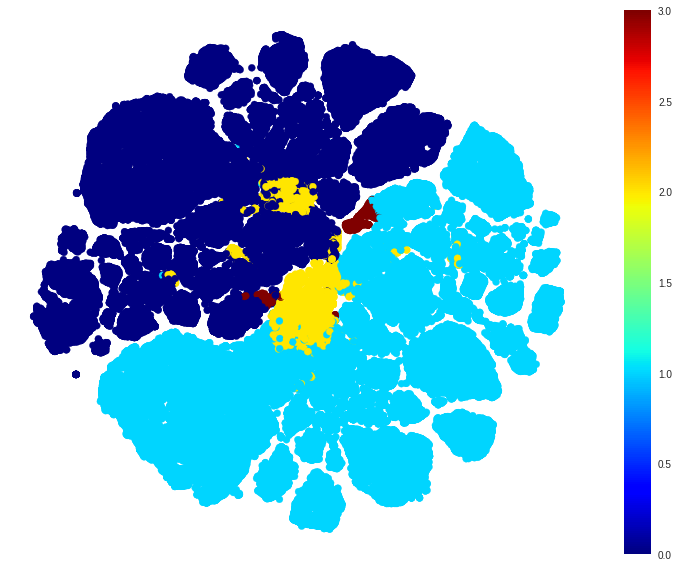

In [43]:
plt.figure(figsize=(13,10 ))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1],c=y_pred, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()